# `LU3IN005 PROJET 3`
# Propagation d’une épidémie

In [3]:
import matplotlib           # library for creating static, animated and interactive visualizations in Python
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd         # package for high-performance, easy-to-use data structures and data analysis
import numpy as np          # fundamental package for scientific computing with Python

## `1` Description du modèle

<div style="width:600px;float:center;margin:0 10px 10px 0">
    <img src="1.png">
</div>

#### 1. Créez la matrice de transition A, la matrice contenant les probabilités de transition entre les différents états. Vérifiez que cette matrice est stochastique.

Let $M$ be the Markov chain represented by $G$ the graph above and $A$ its transition matrix.<br/>
$G$ has three strongly connected components : {${S}$}, {${I}$}, {${R}$}, therefore $G$ is not a strongly connected graph and $M$ is not an irreducible Markov chain.<br/>
$M$ has an absorbing state $R$ and two transient states $S$ and $I$ from which there exists a sequence of state transitions with nonzero probability that lead to the absorbing state, therefore $M$ is an absorbing Markov chain and the powers of its transition matrix $A$ will approach a limiting matrix.<br/><br/>
$A$ is a marix of size $3 \times 3$. $A_{(i,j)}$ is the probability of transitioning from $j → i$. $A$ satisfies the following conditions:<br/>
$\forall i,j$ $A(i,j) ≥ 0$;<br/>
$\forall j$ $\sum_{i=1}^{M} A(i,j) = 1$.<br/>
Thus $A$ is a Stochastic Matrix.<br/>

In [4]:
# transition matrix A of size 3x3
A = np.array([  [0.92,  0,      0],
                [0.08,  0.93,   0],
                [0,     0.07,   1]])
                
if np.any(np.sum(A, axis=0) != 1) or np.any(A < 0):
    print("Transition matrix is not Stochastic.")
else:
    print(A)

[[0.92 0.   0.  ]
 [0.08 0.93 0.  ]
 [0.   0.07 1.  ]]


#### 2. Créez $\pi_0$ la distribution de probabilité initiale. Nous allons regarder l’évolution du nombre d’individu sains, infectés et guéris au cours du temps. Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.<br/>

We note $v_0 = \pi_0$ the probability vector which represents the initial probability distribution, the $i_{th}$ component of $v_0$ represents the probability that the chain starts in state $s_i$.

In [5]:
# v0 is a vector which represents the initial probability distribution
v0 = np.array([0.9, 0.1, 0])

### `1.1` Tirage aléatoire des états

In [76]:
v0_sum = np.cumsum(v0)

def tirage_aleatoire(T, A, v0_sum):
    """Function that produces a state chain for one individual for a given T."""
    etat_courant = np.argwhere(v0_sum >= rnd.random())[0,0]                 # randomly choosing one of the possible states from v0

    state_chain = [etat_courant]                                            # to store the chain
    for i in range(T):
        transition_prob = np.cumsum(A[:, etat_courant])
        etat_courant = np.argwhere(transition_prob >= rnd.random())[0,0]    # randomly choosing one of the possible states from the current state
        state_chain.append(etat_courant)                                    # add the state to the chain
    return state_chain


np.array(tirage_aleatoire(50, A, v0_sum))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

### `1.2` Modélisation d’une population

1. A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et
affichez l’évolution du nombre d’individus dans les trois états en fonction du temps (population de 20000 individus, T=150).<br/>

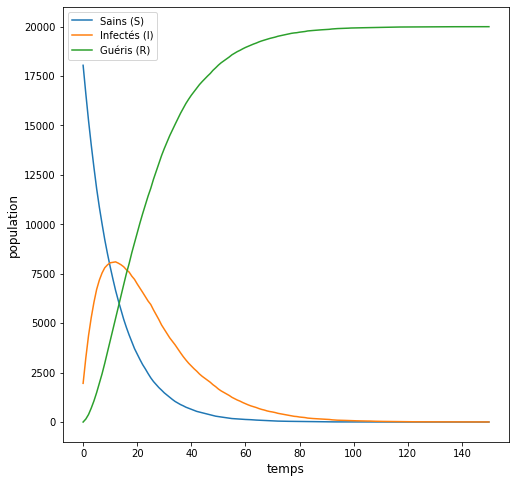

In [7]:
T = 150
a = np.array([tirage_aleatoire(T, A, v0_sum) for _ in range(20000)])                     # creates a chain of T states for every individual in a population of 20000

def plot_population(population):
    """Function plots the number of individuals in every state (S, I or R) for time T."""
    count = np.zeros((3, population.shape[1]))                                           # a list of possible states at every t in 0,...,T
    for j in range(population.shape[1]):                                                 # for every t in 0,...,T
        count[0, j] = len(np.where(population[:,j] == 0)[0])                             # count healthy individuals
        count[1, j] = len(np.where(population[:,j] == 1)[0])                             # count sick individuals
        count[2, j] = len(np.where(population[:,j] == 2)[0])                             # count recovered individuals
    x = [i for i in range(population.shape[1])]                                          # for every t in 0,...,T

    plt.figure(figsize=(8,8))
    plt.xlabel('temps', fontsize=12)
    plt.ylabel('population', fontsize=12)
    plt.plot(x, count[0, :])                                         # plot healthy individuals
    plt.plot(x, count[1, :])                                         # plot sick individuals
    plt.plot(x, count[2, :])                                         # plot recovered individuals
    plt.gca().legend(('Sains (S)','Infectés (I)', 'Guéris (R)'))
    plt.show()

    return count

count = plot_population(a)

<br/>
2. Quand t est grand, quel est la proportion d’individus sains, infectés et guéris ?

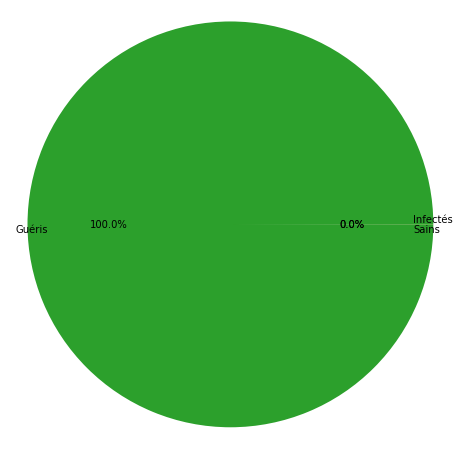

In [8]:
# proportion of induviduals in each state (susceptible, infected and removed) at time t=T=150
propS = count[0, T] * 100 / 20000
propI = count[1, T] * 100 / 20000
propR = count[2, T] * 100 / 20000

labels = 'Sains','Infectés', 'Guéris'
sizes = [propS, propI, propR]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labeldistance=0.9, labels=labels, rotatelabels=True, autopct='%1.1f%%')
# ensures that pie is drawn as a circle
ax1.axis('equal')

plt.show()

The pie chart shows the proportion of **susceptible**, **infected** and **removed** individuals when $t=150$. As expected, since $M$ is an absorbing Markov chain, $A^t$ reached the limiting matrix where each column equals the limiting probability distribution vector $\pi_l\approx (0,0,1)$.

### `1.3` Pic de l’épidémie
1. Au pic de l’épidémie, combien d’individus sont infectés ? A quel temps se produit le pic ?

In [9]:
# max of the number of induviduals in the 1st state (Infected)
maxElement = np.max(count[1, :])
result = np.where(count[1, :] == maxElement)
print('Le pic se produit a temps', result[0][0], 'avec', maxElement, 'personnes infectés.')

Le pic se produit a temps 12 avec 8101.0 personnes infectés.


### `1.4` Longueur de l’infection
1. À partir des simulations, estimer la longueur moyenne d’une séquence de I<br/>

In [103]:
n=10000                                                                                 # number of simulations of M
total_infecte=0                                                                         # stores the total number of times of being in the I state
for i in range(n):
    chaine = np.array(tirage_aleatoire(200, A, v0_sum))                                 # generates M of length 200
    total_infecte+=np.count_nonzero(chaine == 1)

print('La longueur moyenne de séquence de I est ~', total_infecte/n, 'pour',n,'simulations.')

La longueur moyenne de séquence de I est ~ 14.1762 pour 10000 simulations.


2. Calculer théoriquement la longueur d’une séquence de I en fonction de la probabilité de rester
infecté, si on est infecté au temps précédent (vous pourrez utiliser l’espérance de la loi géométrique).

We note $X$ the random variable of the number of times we stay in the state $I$ until we transition to $R$, then $E(X)=\frac{1}{1-0.93}\approx 14,286$.<br/><br/>
Another method would be to calculate $N$ the fundamental matrix of the absorbing Markov chain $M$, we get :<br/><br/>
$N=\begin{matrix}
12.5 & 14,286 \\
0 & 14,286
\end{matrix}$<br/><br/>
where $N_{S,I}=14,286$ and $N_{I,I}=14,286$, which means that the expected number of times the chain is in state $I$, given that the chain started in state $S$ or $I$, is $14,286$. We notice that the value observed in the question above is very close to the theoretical value.

## `2` Modèle ergodique

<div style="width:600px;float:center;margin:0 10px 10px 0">
    <img src="2.png">
</div>

1. Créez la nouvelle matrice de transition, et les nouvelles simulations, comment la population évoluet-elle si un individu guérit peut redevenir infecté ?<br/>

The new model does not have an absorbant state and therefore the number of susceptible and infected individuals does not approach $0$ as in the previous model. Instead, the proportion of people in different classes stabilizes at $t$ around $50$ with removed individuals being the largest class since the probability of transitioning from $R$ to $S$ is quite small.

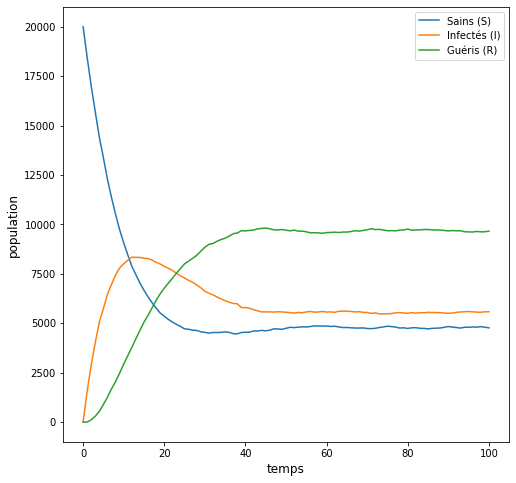

In [8]:
# transition matrix A of size 3x3
A = np.array([  [0.92,  0,      0.04],
                [0.08,  0.93,   0],
                [0,     0.07,   0.96]])
                
if np.any(np.sum(A, axis=0) != 1) or np.any(A < 0):
    print("Transition matrix is not Stochastic.")

# v0 is a vector which represents the initial probability distribution where all individuals are healthy at t=0
v0 = np.array([1, 0, 0])
v0_sum = np.cumsum(v0)

# creates a chain of 100 states for every individual in a population of 20000
a = np.array([tirage_aleatoire(100, A, v0_sum) for _ in range(20000)]);

count = plot_population(a)

<br/>
2. Refaire les simulations avec une autre distribution de probabilité initiale, par exemple si au temps
t = 0, nous avons 90% d’infectés et 10% de sains. Explorez d’autres initialisations et commentez
vos observations.

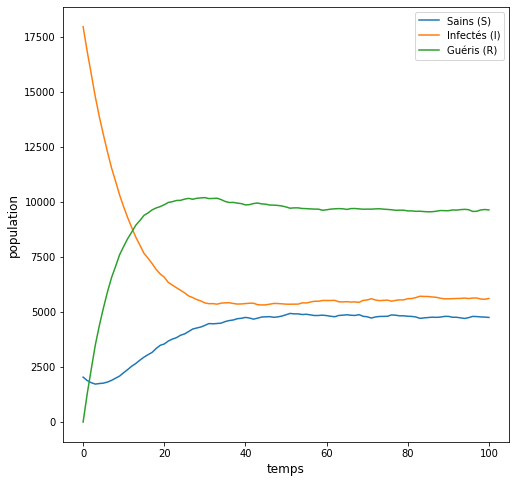

In [9]:
# v0 is a vector which represents the initial probability distribution where 10% of individuals are healthy and 90% are infected at t=0
v0 = np.array([0.1, 0.9, 0])
v0_sum = np.cumsum(v0)

# creates a chain of 100 states for every individual in a population of 20000
a = np.array([tirage_aleatoire(100, A, v0_sum) for _ in range(20000)])

count = plot_population(a)

Doing different simulations with different initial probability distributions always results in the same proportion of susceptible, infected, and removed individuals with t sufficiently large. This is expected since we are simulating an ergodic Markov chain with different $\pi_0$ that always approach the unique steady state.

<br/>
3. Quels est la nature des états de cette chaine de Markov ? Est-elle périodique ? Est-elle irréductible ?<br/>

Let $M'$ be the Markov chain represented by $G'$ the graph above and $A'$ its transition matrix.<br/>

$G'$ has one strongly connected component : {$S,I,R$}, therefore $G'$ is a strongly connected graph and $M'$ is an **irreducible** Markov chain.<br/>
Every state $e$ in $M'$ has an edge $e → e$ of nonzero weight (state transition with nonzero probability) in $G'$,<br/>
it follows that all states in $M'$ are aperiodic and therefore $M'$ is an **aperiodic** Markov chain.<br/>
$M'$ is **homogeneous** since its transition probabilities are independent of the time $t$.<br/>
A homogeneous, irreducible Markov chain with a finite discrete state space is **positively recurrent**.<br/><br/>

From all of the above it follows that $M'$ is an **ergodic** Markov chain and it has a unique steady-state probability vector $\pi^{*}$.

<br/>4. Calculer la distribution de probabilité stationnaire à partir de la matrice de transition et comparez ce résultat avec les simulations pour $t$ assez grand.

$\pi^{*}$ has the following properties :<br/><br/>
$\pi^{*} · A' = \pi^{*}$<br/>
$\pi^{*} · 1 = 1$<br/><br/>
To calculate the theoretical value of the unique steady-state probability vector $\pi^{*}$ we need to solve the equation system:
$$
\begin{align}
0.92s + 0.04r & = s \\
0.08s + 0.93i & = i \\
0.07i + 0.96r & = r \\
s + i + r & = 1 \\
\end{align}
$$
We get that $\pi^{*}=(\frac{7}{29} , \frac{8}{29} , \frac{14}{29}) \approx (0.241,0.276,0.483)$

In [37]:
# transition matrix A of size 3x3
A = np.array([  [0.92,  0,      0.04],
                [0.08,  0.93,   0],
                [0,     0.07,   0.96]])

# calculating epsilon (difference between A^100 and A^99)
for i in range(2,100):
    epsilon = np.linalg.matrix_power(A, i) - np.linalg.matrix_power(A, i-1)
    if np.where(epsilon > 0.0001) == 0:
        break

stationary_matrix = np.linalg.matrix_power(A, i)
print('The transition matrix of the stationary probability distribution is around:\n', stationary_matrix, '.\n')
print('The the stationary probability is represented by the vector: ', "{:10.3f}".format(stationary_matrix[0][0]),',', "{:10.3f}".format(stationary_matrix[1][0]),',', "{:10.3f}".format(stationary_matrix[2][0]), '.')

The transition matrix of the stationary probability distribution is around:
 [[0.24141907 0.24138679 0.24135515]
 [0.27580734 0.27589499 0.27587062]
 [0.48277359 0.48271822 0.48277422]] .

The the stationary probability is represented by the vector:       0.241 ,      0.276 ,      0.483 .


We note that the value observed in the question above is very close to the theoretical value of $\pi^{*}$.

## `3` Modification du modèle : confinement

Cette question est indépendant de la question 2. On peut imaginer que si des mesures de distanciation sociale sont mises en place, la probabilité de devenir infecté est plus faible.
Nous allons considérer qu’en période de distanciation la probabilité de devenir infecté quand on est un individu sain est de 0.02.<br/><br/>
1. Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? Modifiez le premier modèle pour créer une nouvelle matrice des probabilités de transitions A2, et comparer les simulations au premier modèle.<br/><br/>

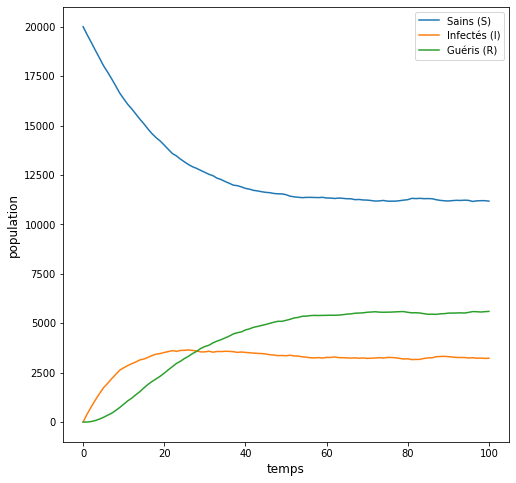

In [102]:
# transition matrix A of size 3x3
A2 = np.array([  [0.98,  0,      0.04],
                [0.02,  0.93,   0],
                [0,     0.07,   0.96]])
                
if np.any(np.sum(A2, axis=0) != 1) or np.any(A2 < 0):
    print("Transition matrix is not Stochastic.")

# v0 is a vector which represents the initial probability distribution where all individuals are healthy at t=0
v0 = np.array([1, 0, 0])
v0_sum = np.cumsum(v0)

# creates a chain of 100 states for every individual in a population of 20000
a = np.array([tirage_aleatoire(100, A2, v0_sum) for _ in range(20000)])
count = np.zeros((3, a.shape[1]))

count = plot_population(a)

Commentaire.

<br/>
2. Maintenant nous allons alterner entre les périodes de non distanciation et de distanciation.<br/>
— Commencer les simulations avec la matrice A. On peut considérer qu’au temps initial tous les individus sont sains.<br/>
— Quand il y a 30% d’individus infectés dans la population, nous passons en période de distanciation, continuer les simulations avec la seconde matrice de transition A2.<br/>
— Le nombre d’individus infectés va décroître. Quand il y a moins de 15% d’infectés, le confinement est levé ; on continue les simulations avec la première matrice A.<br/>

In [123]:
def tirage_aleatoire_alterne(T, alterne, A1, A2, v0_sum):
    """Function that produces a state chain for one individual for a given T with alternations of social distancing."""
    etat_courant = np.argwhere(v0_sum >= rnd.random())[0,0]                 

    state_chain = [etat_courant]                                                # to store the chain
    
    current_A = 0
    while T > 0:
        for i in range(min(alterne, T)):
            if current_A == 1:
                transition_prob = np.cumsum(A2[:, etat_courant])
            else:
                transition_prob = np.cumsum(A1[:, etat_courant])

            etat_courant = np.argwhere(transition_prob >= rnd.random())[0,0]    # transition to a state with the highest transition probability
            state_chain.append(etat_courant)                                    # add the state to the chain
        current_A = (current_A + 1) % 2
        T -= alterne
    return state_chain


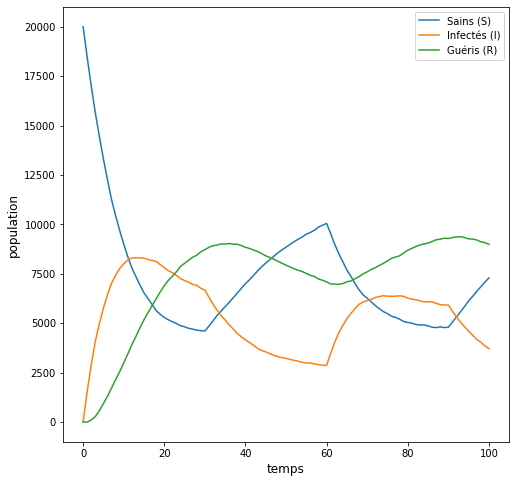

In [126]:
# v0 is a vector which represents the initial probability distribution where all individuals are healthy at t=0
v0 = np.array([1, 0, 0])
v0_sum = np.cumsum(v0)

# creates a chain of 100 states for every individual in a population of 20000
a = np.array([tirage_aleatoire_alterne(100, 30, A, A2, v0_sum) for _ in range(20000)])
count = np.zeros((3, a.shape[1]))

count = plot_population(a)

## `4` Optionnel
Vous pouvez maintenant modifier le(s) modèle(s) pour étudier différents cas de figure :<br/><br/>
1. Vous pouvez modifier <br/>
— la taille de la population ;<br/>
— la distribution de probabilité initiale ;<br/>
— les probabilité de transition pour voir comment cela va affecter la propagation de l’épidémie.<br/><br/>

What do we observe if the size of the population is very small?<br/>
What do we observe if we increase the probability to stay in the Infectious state?

<br/>
2. Quelle remarque critique pouvez faire sur le modèle SIR? Proposez-vous des améliorations ? <br/>

Ce modèle **SIR** pour prédire la propagation de la maladie pendant une pandémie nécessite des **hypothèses trop simplistes** sur la transmission de la maladie au sein de la population. Nous faisons trois hypothèses principales dans ce modèle :<br/><br/>

1) la population reste constante;<br/>
2) le taux d'augmentation des personnes infectées est constant et proportionnel au contact entre les groupes infectés et les groupes seins;<br/>
3) le taux de rétablissement des personnes infectées est constant.<br/><br/>

Ces hypothèses formulées pour simplifier les phénomènes du monde réel sont nécessaires pour que le modèle soit **compact** et fonctionne en un **temps de calcul raisonnable** pour une population de taille importante.

Nous pourrions **améliorer la précision** de ce modèle d'épidémie **en prenant en compte les facteurs** tels que l'âge, l'endroit géographique ou l'utilisation des transports publics.